<h1>Week 5</h1>
<br><br>
<i>Monday</i>

First of all, I love this plot from over the weekend so much I'm including it in this week's documentation as well:

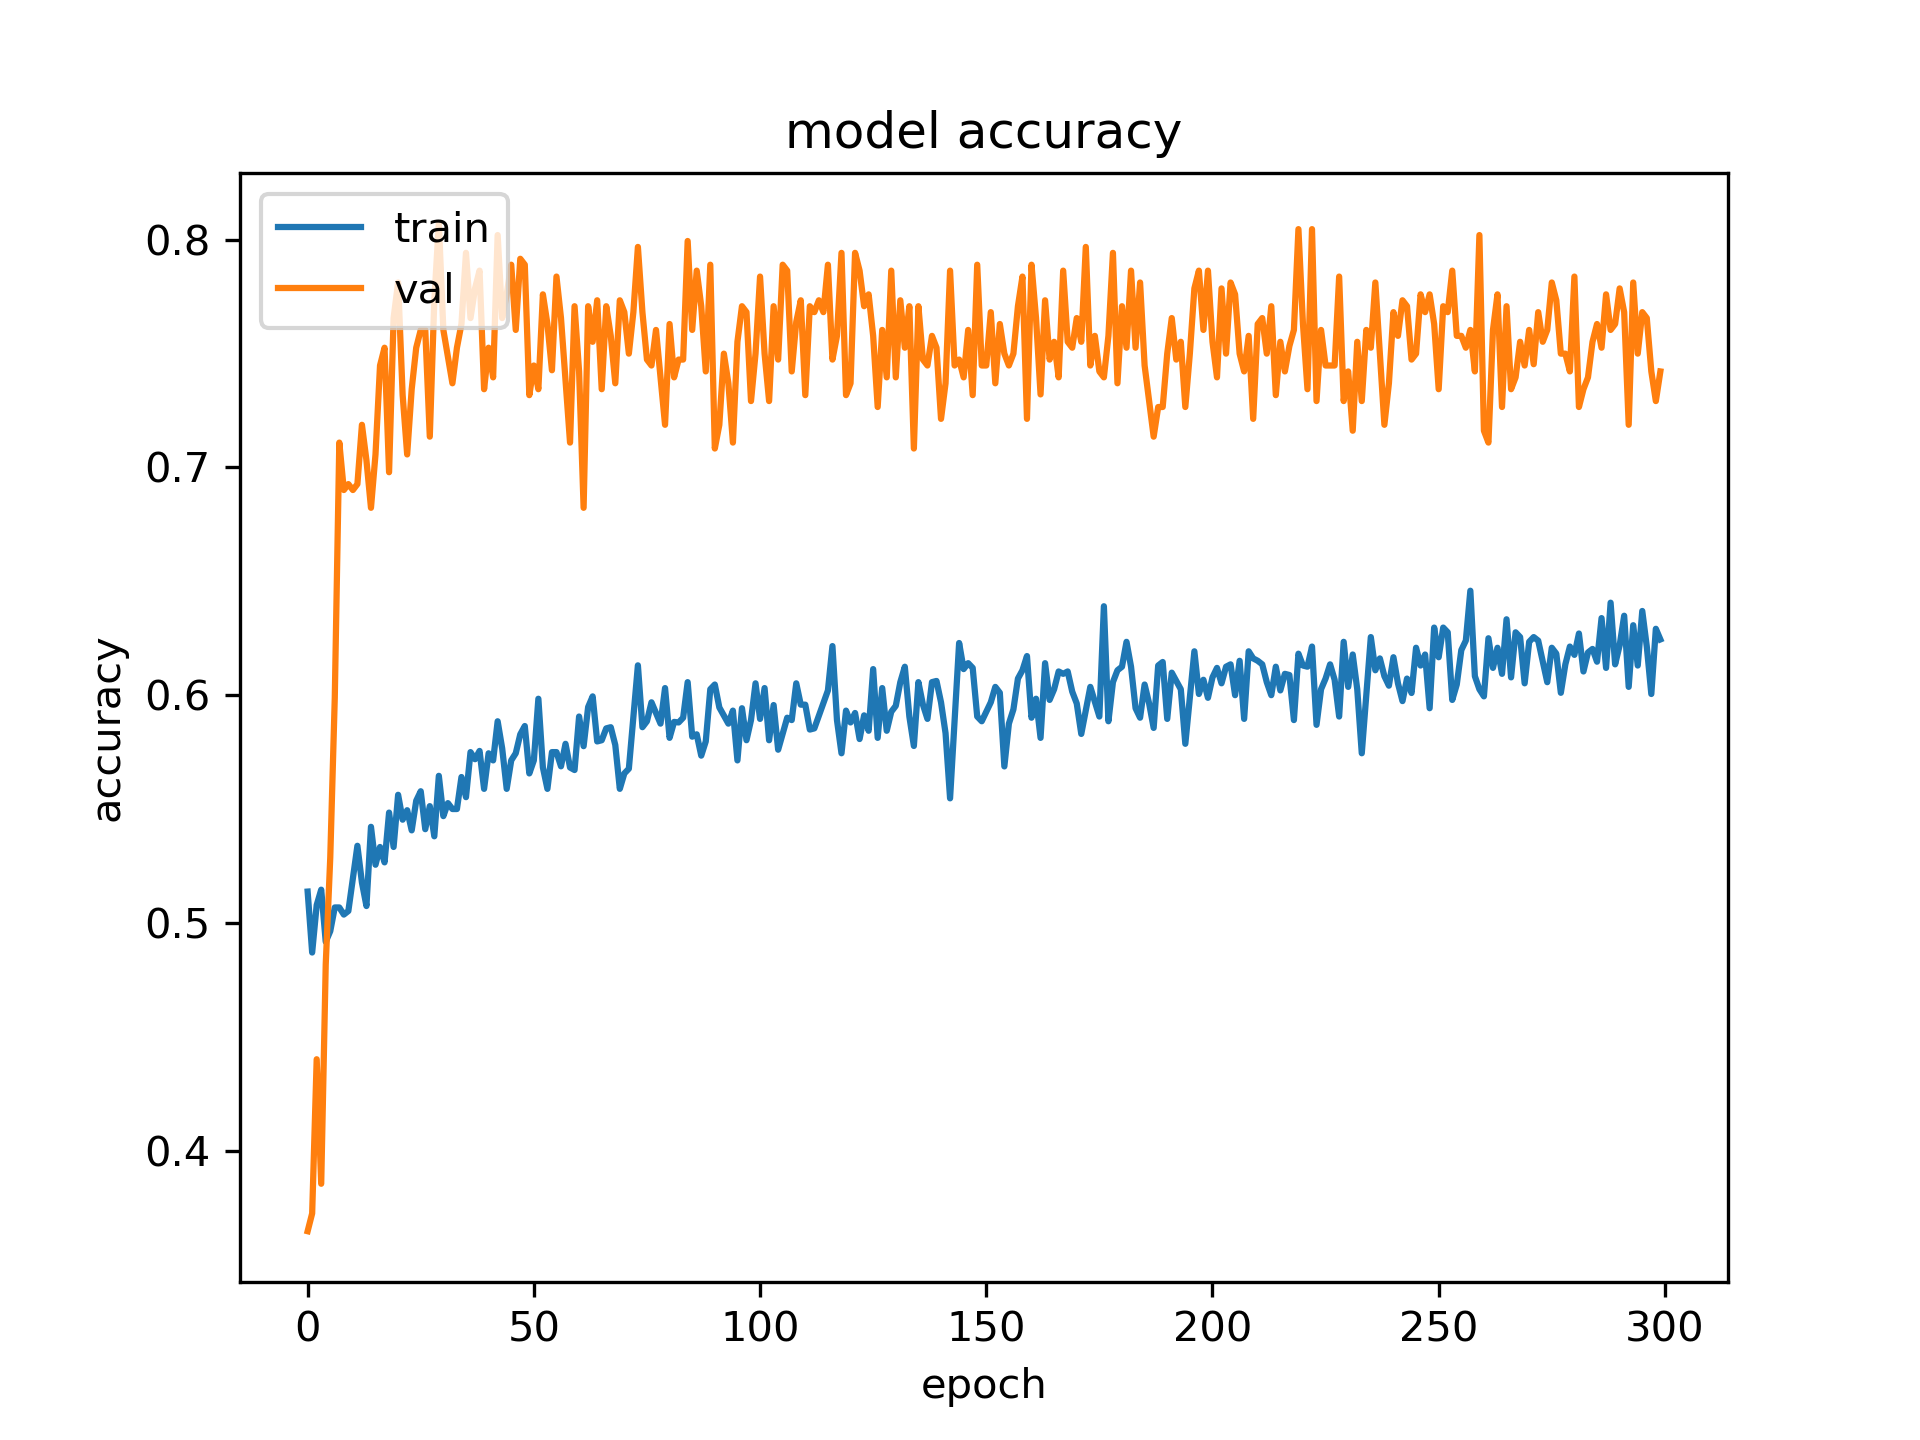

It's the first plot that shows good results for accuracy for over 300 epochs, so yay!! :D(the validation accuracy is much higher than the predicted accuracy because of the use of a gabjillion regularisation techniques (image augmentation, L2, and two dropouts)

Secondly, <b>this is how you find the index for the labels:</b>

<code>print(validation_generator.class_indices)</code>

Two week long mystery? Solved! I'm serious.

Also, <b>this is how you print all the filenames</b> (relative path both classes):

<code>print(validation_generator.filenames)</code>

It happens to show the order <code>flow_from_directory</code> goes in (which is extended_sources first, then non-es)

To print out first 10 predictions from the CNN, use:

<code>print(Y_pred[0:10])</code>, where <code>Y_pred = model.predict_generator(some_params)</code>

<b>NOTE</b>: do not panic if your code returns ~0.50 for the predictions. Check the number of epochs first. If the number of epochs is 2, run it again with a significant epochs to check if the output is still the same (spoilers: it is - see below).

Btw, you can actually save the terminal output, it's just the standard <code>ctrl + S</code>

Also, the main issue right now is that Y_pred does not have the same number of rows as y_pred (first has 20587 rows, but the latter has 512)
<br><br><br><br>
<i>Tuesday</i>

First things I found after running the code overnight consists of one good thing an one bad thing that might get quite messy. Good thing: my code is stable. The outpout is consistent, so much so, I almost didn't notice the change in graphs (the first squiggle at the bottom left is different).

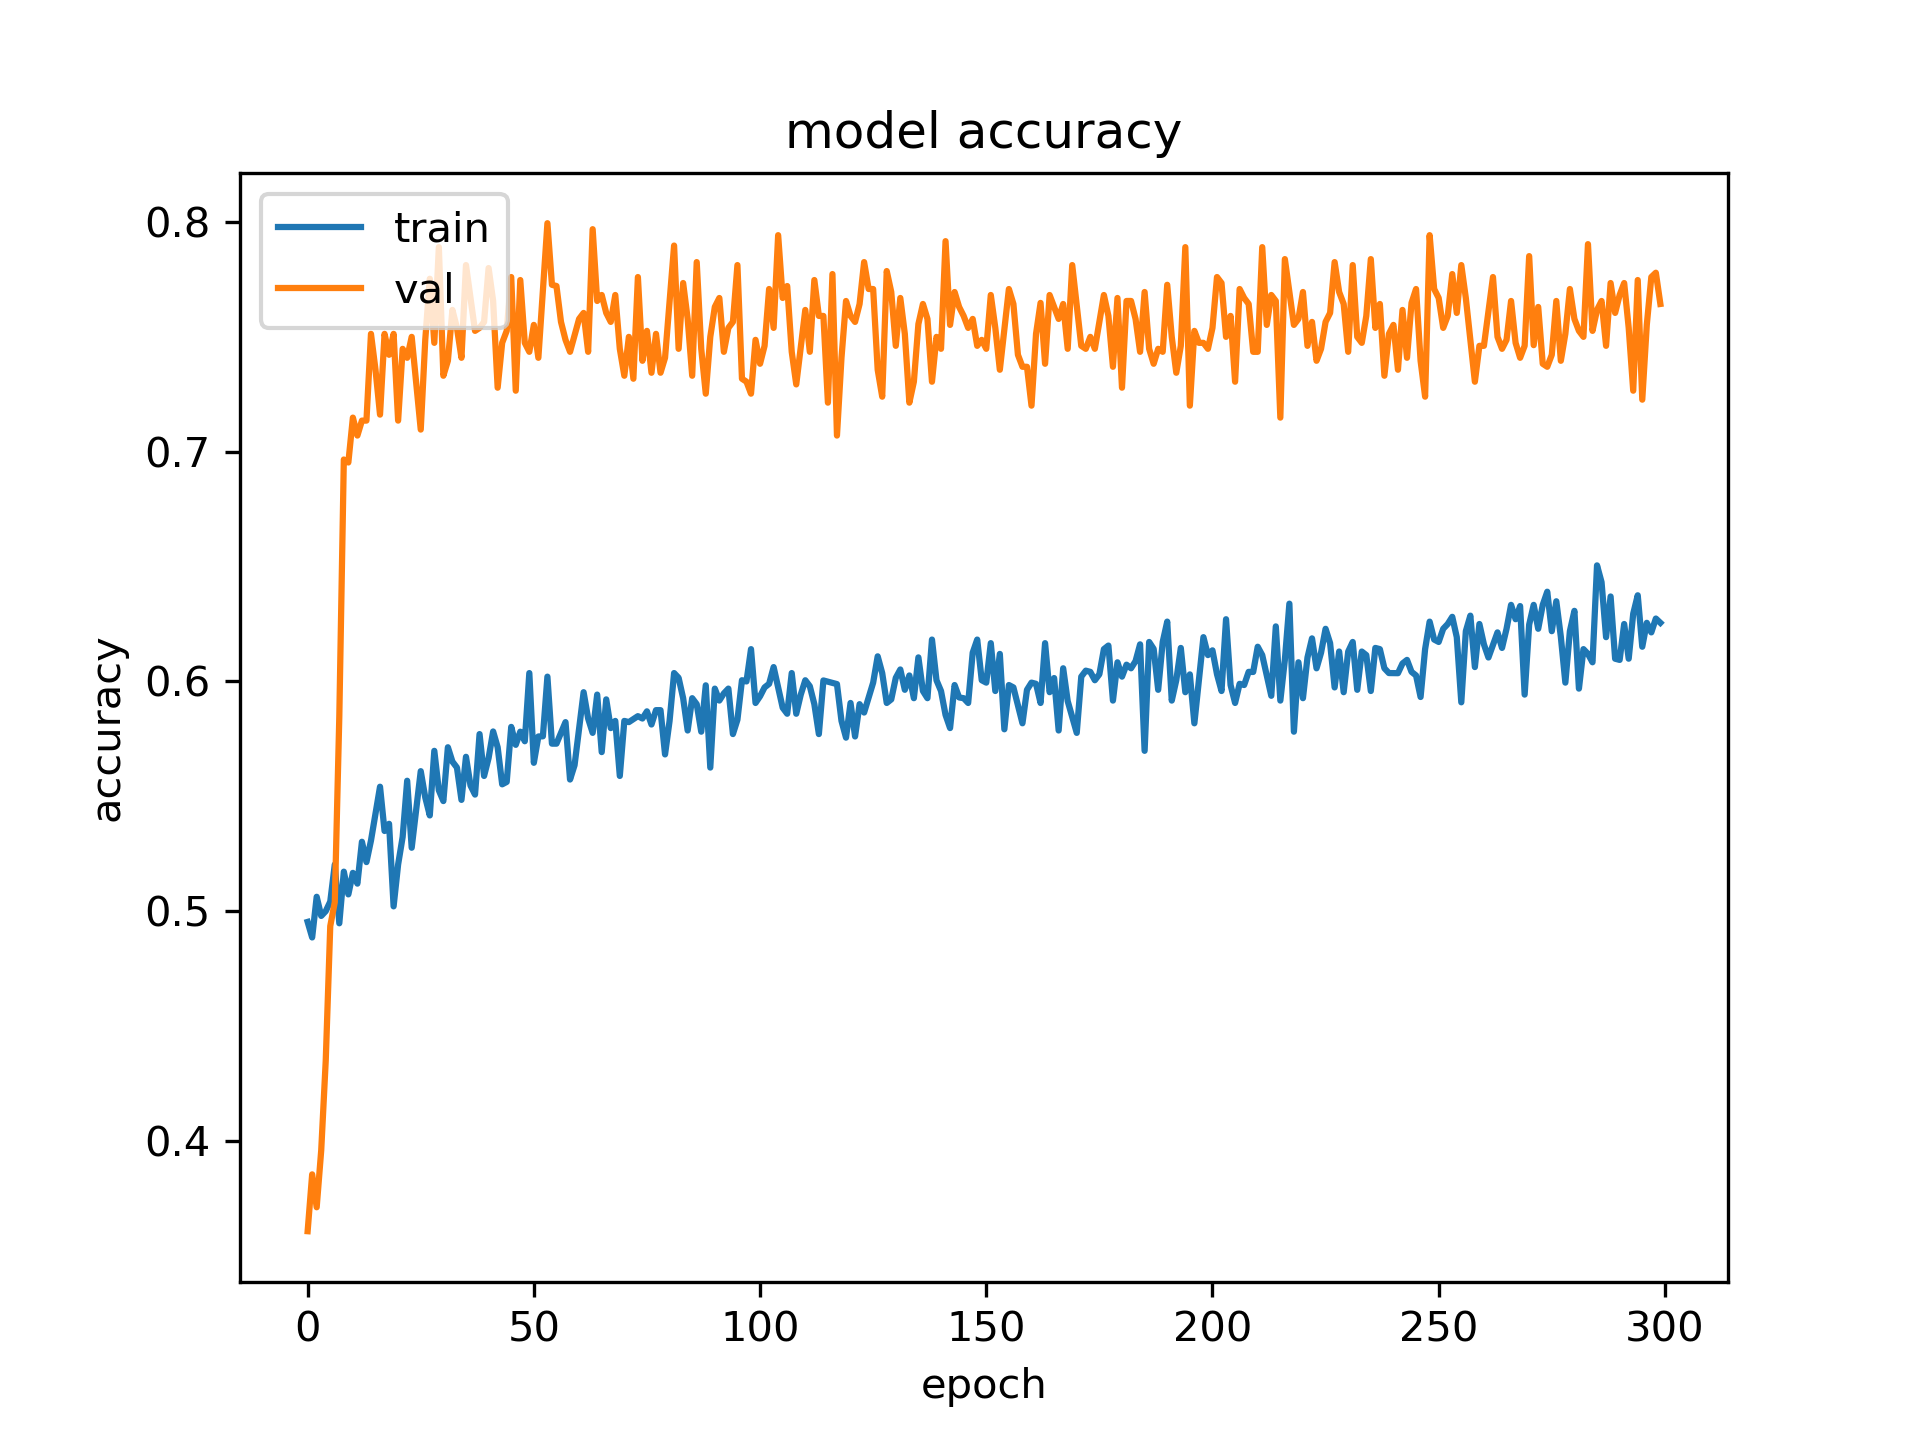

Bad news: well, other than not getting the ROC curve going (due to differing array lists, which should be relatively easy to sort, but I don't knpow how and I think at this point, I'll need help with it) it seems that my prediction probability is around 50% (first output, which is a list. I forgot to label it in the terminal). 

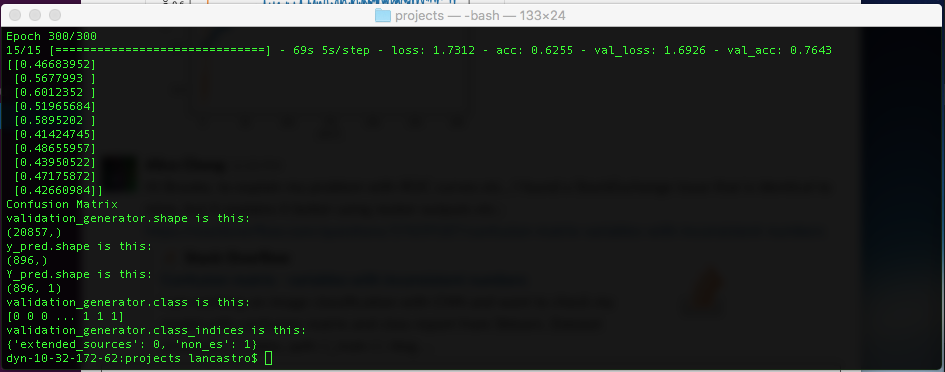

"........................."

I guess at least the output is not consistently at 50%, but around 10% at other side. This might be caused by noisy data? 

Oh ROC curve...... You'd answer so many questions.....

I have actually tried np.reshape(), but I get errors like so:
 
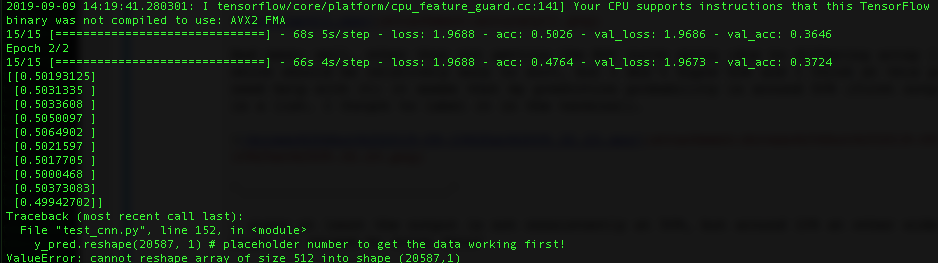

And the original error which prevented the ROC curve was this:

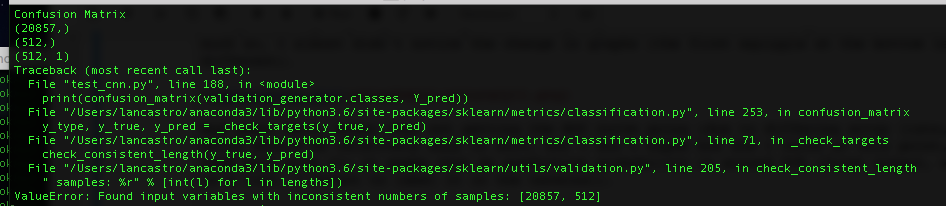

where the first value is the output from <code>validation_generator.classes</code>, i.e. the original (true) images and the second is the predicted images, from the <code>model.predict_generator()</code> function, but went through <code>np.argmax()</code>

Whoop-whoop! I got Keras to save the epoch, training accurary, training loss, validation accuracy and validation loss in a log file!

To do this<br><br>
<code>from keras.callbacks import CSVLogger<br>
csv_logger = CSVLogger('training.log')<br>
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    use_multiprocessing=True,
    <b>callbacks=[csv_logger])</b>
</code>

You get this result in your saved file:

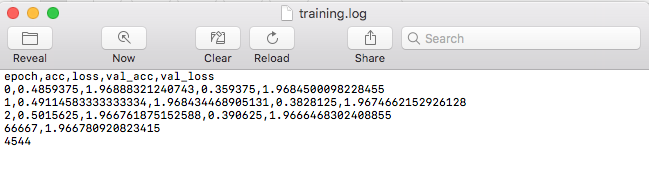

I then implented TensorBoard in Python:<br><br>
<code>from keras.callbacks import TensorBoard<bt>
   tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))<br>
    history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    use_multiprocessing=True,
    callbacks=[csv_logger, <b>tensorboard<b>])
</code>

To make TensorBoard work, type this into a separate terminal before you run your code: <code>tensorboard --logdir=logs/</code>

<i>Wednesday</i>

For this particular version, use this link: http://dyn-10-32-172-62.winet.local:6006

If you click on the 'wall' option, it tells you the local time when your code returns a particular thing.

I enabled shuffle today, so if there is noise, watch out for that.

<i>Friday</i>

I also redid the hisotgram program so that it can plot <code>.csv</code> files.

I then got the code to load training model working, so I can just load the model to make some predictions. For some reason, this is outputting (mostly) the correct results!! :D 
here's the historgram:

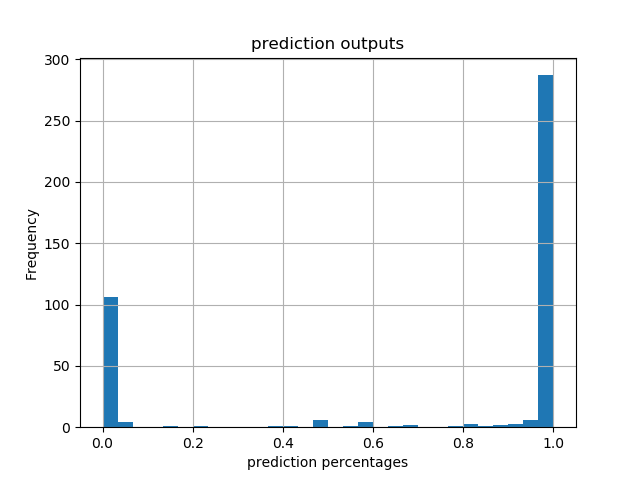

I said <i>mostly</i> because the program predicted more non-galaxies than galaxies, but I feel like some of the galaxies pictures are indeed quite blurry, which might contribute to that. It seem to predict the more noisy pictures as non-galaxies, and for completely black pictures (with nothing in them), the program correctly predicted 50% with a +/- 10% error. Fro a brief visual inspection, it seems to get most of the categories correct, so I guess, a roc curve is called for, and predictions for a labelled dataset is definitely called for!

Ps, the images that have around 50% predictions:

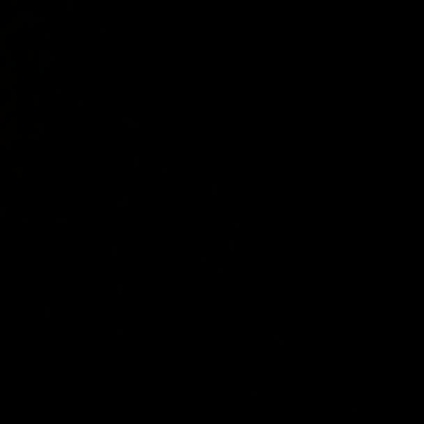

Spent most of the data trying to get the program to save the data into multiple columns but it didn't like it because I have a list and two arrays. After hours of trying to get it to work (and it didn't), I got exasperated  and used Excel, so that I didn't have to print out the lists. Instead, because I know the class indices for files from each folder, and I can create a <code>.csv</code> file containing the names of every file in the folder, I just imported the names into excel, and applied 0 for the first folder of names, then 1 into the second folder. I then saved it into another <code>.csv</code> file. Fortunately it didn't take too long (5 minutes I think?).